# Regressão Linear Múltipla
* Criar uma função de produção de educação dos cursos de economia no Brasil ou função de desempenho
* Variáveis que traduzem características do aluno como: esforço, família, história, estrutura, sexo e cor
*  É utilizada para controlar outros fatores que estejam relacionados à variável dependente: variável de interesse e variável de controle. 
* Busca da explicação da correlação entre as variáveis para explicar o desempenho dos alunos de economia do país.
* Individuar a variável de interesse e controlar o conjunto de variáveis de controle de mesmo grupo, mantendo todo o resto constante. Isso mantêm as mesmas características.
* Controlar outros fatores que estejam relacionados a variável de interesse. Caso contrário eles devem refletir no termo erro e resultar num padrão de comportamento que não esta nas variáveis independentes.
> Problema: muitas das variáveis independentes podem ser correlacionadas entre si e resultar em  multicolinearidade.

    > A multicolinearidade deixa o estimador ineficiente: ou seja, ele não é o estimador com a menor variância possível, a estatística T deve ficar menor, provavelmente regeitando a hipótese nula. Induzindo a multicolinearidade as estatísticas ficam menores, regeitando a hipótese nula por uma característica que não é do modelo e sim de das variáveis. 
    
    > Testes ('F') para saber qual variável se adequa mais ao modelo. Talvez criar um avariável que tome conta de todas
    
* Hoje em dia é possível construir fatores para driblar o problema da multicolinearidade. 
* Vetores Ortogonais: Umvetor de variável não esta correlacionado com o outro (análise fatorial)
* Construção de um índice utilizando todas as variáveis correlacionadas 
---
1. Matriz de correlação entre as variáveis




In [2]:
library(dplyr)
library(ggplot2)
library(gplots)
library(cowplot)
library(graphics)
library(lmtest)
library(ggpubr)
library(Amelia)
library(plyr)
library(fastDummies)

In [8]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [4]:
dim(data)

[1] 548127    137

# Alunos de Ciências Econômicas que fizeram o Enade


In [9]:
df = data[data$CO_GRUPO == 13 & data$TP_PRES == 555,]
head(df)
dim(df)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
161,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
162,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
163,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
164,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
165,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
166,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6


[1] 8075  137

# Variáveis de interesse
### Ponderação: esforço, família, história, estrutura da universidade, sexo e raça
* Notas Gerais = 45 NT_GER
* Código da IES = 3 CO_CATEGAD
1. Sexo = 12 TP_SEXO
2. Raça ou Cor = 71 QE_I02
## Família
3. Estado Civil = 70 QE_I01
4. Escolaridade do pai = 73 QE_I04
5. Escolaridade da mãe = 74 QE_I05
6. Moradia = 75 QE_I06
7. Quantas pessoas moram com o estudante = 76 74 QE_I07
8. Renda total da família = 77 QE_I08
9. Situação Financeira = 78 QE_I09
10. Situação de Trabalho = 79 QE_I10
11. Contemplado com bolsa = 80 QE_I11
12. Se recebeu algum tipo de bolsa de permanência = 81 QE_I12
13. Se recebeu algum tipo de bolsa acadêmica = 82 QE_I13
14. Ingresso por meio de política de ação afirmativa ou inclusão social = 84 QE_I15
15. Tipo de escola cursou o ensino médio = 86 QE_I17
16. Modalidade de ensino = 87 QE_I18
17. Incentivo = 88 QE_I19
18. Grupo que ajudou a enfrentar dificuldades = 89 QE_I20
19. Alguêm da família que concluiu o ensino superir = 90 QE_I21
20. Quantidade de livros lido = 91 QE_I22
21. Horas dedicadas as estudo = 92 QE_I23
22. Motivo para ter escolhido a instituição de ensino = 94 QE_I25
23. O curso ofereceu oportunidades para superar dificuldades = 109 QE_I40
24. O curso exigiu organização e dedicação aos estudos = 111 QE_I42
## Estrutura da universidade
25. Metodologia de ensino = 98 QE_I29
26. Plano de ensino = 107 QE_I38
27. Coordenação = 110 QE_I41
28. Enventos = 114 QE_I45 
29. Domínio do conteúdo pelos professores = 126 QE_I57
30. Tecnologia da informação TIC's = 127 QE_I58
31. Quantidade de funcionários de apoio = 128 QE_I59
32. Infraestrutura das salas = 130 QE_I61
33. Equipamentos e materiais para aulas práticas em número suficiente = 131 QE_I62
34. Ambientes e equipamentos para aulas práticas adequados = 132 QE_I63
35. Biblioteca = 133 QE_I64
36. Refeitorio, cantina e banheiros em condições adequadas = 137 QE_I68



In [12]:
df = select(df, 3, 45, 12, 71, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 94, 109, 111, 98, 107, 110, 114, 126, 127, 128, 130, 131, 132, 133, 137)

In [13]:
dim(df)

[1] 8075   38

In [14]:
str(df)

'data.frame':	8075 obs. of  38 variables:
 $ CO_CATEGAD: int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ NT_GER    : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ TP_SEXO   : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ QE_I02    : Factor w/ 7 levels "","A","B","C",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ QE_I01    : Factor w/ 6 levels "","A","B","C",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ QE_I04    : Factor w/ 7 levels "","A","B","C",..: 5 5 5 3 3 3 4 3 4 3 ...
 $ QE_I05    : Factor w/ 7 levels "","A","B","C",..: 5 3 5 4 5 3 5 3 5 4 ...
 $ QE_I06    : Factor w/ 7 levels "","A","B","C",..: 4 2 4 4 4 3 3 4 3 3 ...
 $ QE_I07    : Factor w/ 9 levels "","A","B","C",..: 4 4 4 5 3 4 6 4 5 4 ...
 $ QE_I08    : Factor w/ 8 levels "","A","B","C",..: 4 5 4 3 3 4 3 4 5 4 ...
 $ QE_I09    : Factor w/ 7 levels "","A","B","C",..: 7 6 4 6 6 6 3 7 4 5 ...
 $ QE_I10    : Factor w/ 6 levels "","A","B","C",..: 6 6 6 6 6 6 2 6 4 5 ...
 $ QE_I11    : Factor w/ 12 levels "","A

# Valores ausentes

In [15]:
sapply(df, function(x) sum(is.na(x)))

CO_CATEGAD     NT_GER    TP_SEXO     QE_I02     QE_I01     QE_I04     QE_I05 
         0          4          0          0          0          0          0 
    QE_I06     QE_I07     QE_I08     QE_I09     QE_I10     QE_I11     QE_I12 
         0          0          0          0          0          0          0 
    QE_I13     QE_I15     QE_I17     QE_I18     QE_I19     QE_I20     QE_I21 
         0          0          0          0          0          0          0 
    QE_I22     QE_I23     QE_I25     QE_I40     QE_I42     QE_I29     QE_I38 
         0          0          0        435        103        101        128 
    QE_I41     QE_I45     QE_I57     QE_I58     QE_I59     QE_I61     QE_I62 
       217        267         99        180        267        139       1024 
    QE_I63     QE_I64     QE_I68 
      1273        210        199

In [163]:
head(df)

,CO_CATEGAD,NT_GER,TP_SEXO,QE_I02,QE_I01,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,...,QE_I41,QE_I45,QE_I57,QE_I58,QE_I59,QE_I61,QE_I62,QE_I63,QE_I64,QE_I68
161,10008,24.9,F,A,A,D,D,C,C,C,...,6,6,6,6,6,6,6,6,6,6
162,10008,25.6,M,A,A,D,B,A,C,D,...,6,6,6,6,6,6,6,6,6,6
163,10008,48.7,M,A,A,D,D,C,C,C,...,6,6,6,6,6,6,6,6,6,6
164,10008,35.7,F,A,B,B,C,C,D,B,...,6,6,6,6,6,6,6,6,6,6
165,10008,33.9,M,A,B,B,D,C,B,B,...,6,6,6,6,6,6,6,6,6,6
166,10008,23.5,M,A,A,B,B,B,C,C,...,6,6,6,6,6,6,6,6,6,6


# Variáveis do primeiro modelo:
* Notas Gerais = 45 NT_GER
* IES = 3 CO_CATEGAD
* Sexo = 12 TP_SEXO
* Raça ou Cor = 71 QE_I02
* Renda total da família = 77 QE_I08
* Estado Civil = 70 QE_I01
* Moradia = 75 QE_I06
* Situação Financeira = 78 QE_I09
* Situação de Trabalho = 79 QE_I10
* Tipo de escola cursou o ensino médio = 86 QE_I17
* Alguêm da família que concluiu o ensino superir = 90 QE_I21
* Horas dedicadas as estudo = 92 QE_I23
* Infraestrutura das salas = 130 QE_I61
* Metodologia de ensino = 98 QE_I29
* Biblioteca = 133 QE_I64
* Incentivo = 88 QE_I19

In [22]:
df_1 = df %>% 
        select(NT_GER, CO_CATEGAD, TP_SEXO, QE_I02, QE_I08, QE_I01, QE_I09, QE_I10, QE_I17, QE_I21, QE_I23,
              QE_I61, QE_I64, QE_I29, QE_I06, QE_I19) %>% 
        setNames(c("nota", "IES", "genero", "cor", "renda", "estado_civil", "situacao_financeira", "trabalho",
                  "ensino_medio", "ensino_superior", "horas_estudo", "infra_salas", "biblioteca",  "metodologia",
                  "moradia", "incentivo"))

In [23]:
str(df_1)

'data.frame':	8075 obs. of  16 variables:
 $ nota               : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ IES                : int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ genero             : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ cor                : Factor w/ 7 levels "","A","B","C",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ renda              : Factor w/ 8 levels "","A","B","C",..: 4 5 4 3 3 4 3 4 5 4 ...
 $ estado_civil       : Factor w/ 6 levels "","A","B","C",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ situacao_financeira: Factor w/ 7 levels "","A","B","C",..: 7 6 4 6 6 6 3 7 4 5 ...
 $ trabalho           : Factor w/ 6 levels "","A","B","C",..: 6 6 6 6 6 6 2 6 4 5 ...
 $ ensino_medio       : Factor w/ 7 levels "","A","B","C",..: 2 5 5 2 3 3 2 3 2 2 ...
 $ ensino_superior    : Factor w/ 3 levels "","A","B": 3 2 3 2 2 3 3 2 2 3 ...
 $ horas_estudo       : Factor w/ 6 levels "","A","B","C",..: 4 3 4 3 4 4 6 4 6 3 ...
 $ infra_salas        : i

In [24]:
dim(df_1)

[1] 8075   16

In [27]:
sapply(df_1, function(x) sum(is.na(x)))

nota                 IES              genero                 cor 
                  4                   0                   0                   0 
              renda        estado_civil situacao_financeira            trabalho 
                  0                   0                   0                   0 
       ensino_medio     ensino_superior        horas_estudo         infra_salas 
                  0                   0                   0                 139 
         biblioteca         metodologia             moradia           incentivo 
                210                 101                   0                   0

In [28]:
df_1 = na.omit(df_1)

In [29]:
sapply(df_1, function(x) sum(is.na(x)))

nota                 IES              genero                 cor 
                  0                   0                   0                   0 
              renda        estado_civil situacao_financeira            trabalho 
                  0                   0                   0                   0 
       ensino_medio     ensino_superior        horas_estudo         infra_salas 
                  0                   0                   0                   0 
         biblioteca         metodologia             moradia           incentivo 
                  0                   0                   0                   0

In [30]:
dim(df_1)

[1] 7801   16

In [31]:
head(df_1)

,nota,IES,genero,cor,renda,estado_civil,situacao_financeira,trabalho,ensino_medio,ensino_superior,horas_estudo,infra_salas,biblioteca,metodologia,moradia,incentivo
161,24.9,10008,F,A,C,A,F,E,A,B,C,6,6,6,C,B
162,25.6,10008,M,A,D,A,E,E,D,A,B,6,6,6,A,B
163,48.7,10008,M,A,C,A,C,E,D,B,C,6,6,6,C,A
164,35.7,10008,F,A,B,B,E,E,A,A,B,6,6,6,C,B
165,33.9,10008,M,A,B,B,E,E,B,A,C,6,6,6,C,B
166,23.5,10008,M,A,C,A,E,E,B,B,C,6,6,6,B,B


## Categorizando IES
* privada = c(118,120,121,10005,10007,10008,10009,17634)
* publica = c(93,115,116,10001,10002,10003)

In [41]:
table(df_1$IES)


   93   115   116   118   120   121 10001 10002 10003 10005 10007 10008 10009 
  413   901    46   367    24   258   545  3059    57   506   131  1431    21 
17634 
   42 

In [53]:
df_1$IES_ = ifelse(df_1$IES == 93|df_1$IES == 115|df_1$IES == 116|df_1$IES == 10001|df_1$IES == 10002|df_1$IES == 10003,0,1)


In [54]:
table(df_1$IES_)


   0    1 
5021 2780 

In [56]:
df_1$IES_ = as.factor(df_1$IES_)

In [58]:
str(df_1)

'data.frame':	7801 obs. of  17 variables:
 $ nota               : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ IES                : int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ genero             : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ cor                : Factor w/ 7 levels "","A","B","C",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ renda              : Factor w/ 8 levels "","A","B","C",..: 4 5 4 3 3 4 3 4 5 4 ...
 $ estado_civil       : Factor w/ 6 levels "","A","B","C",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ situacao_financeira: Factor w/ 7 levels "","A","B","C",..: 7 6 4 6 6 6 3 7 4 5 ...
 $ trabalho           : Factor w/ 6 levels "","A","B","C",..: 6 6 6 6 6 6 2 6 4 5 ...
 $ ensino_medio       : Factor w/ 7 levels "","A","B","C",..: 2 5 5 2 3 3 2 3 2 2 ...
 $ ensino_superior    : Factor w/ 3 levels "","A","B": 3 2 3 2 2 3 3 2 2 3 ...
 $ horas_estudo       : Factor w/ 6 levels "","A","B","C",..: 4 3 4 3 4 4 6 4 6 3 ...
 $ infra_salas        : i

In [61]:
df_1$IES_ = mapvalues(df_1$IES_, from=c(0,1), to=c("público","privado"))

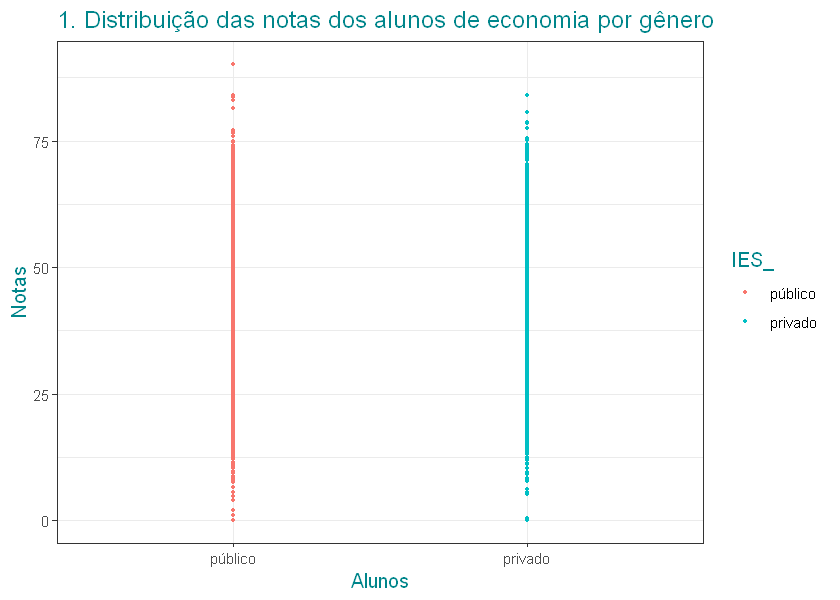

In [62]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data=df_1, aes(y=nota, x=IES_))+
    geom_point(aes(color=IES_), size=0.8)+
    ggtitle("1. Distribuição das notas dos alunos de economia por gênero")+
    labs(x="Alunos", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

In [150]:
table(df_1$genero)



   F    M 
3196 4605 

In [59]:
df_1$cor = mapvalues(df_1$cor, from=c("A","B","C","D","E","F"), to=c("branca","preta","amarela","parda","indigina","não declarado"))

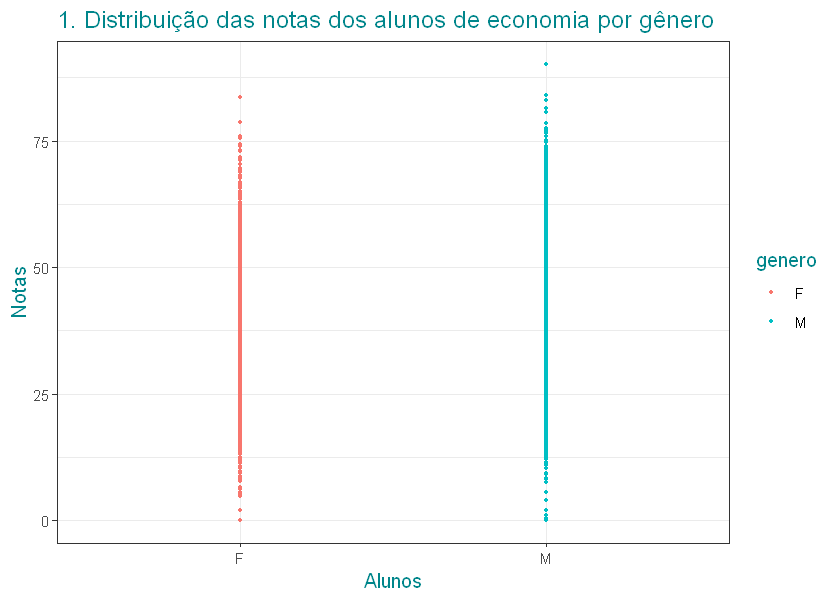

In [60]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data=df_1, aes(y=nota, x=genero))+
    geom_point(aes(color=genero), size=0.8)+
    ggtitle("1. Distribuição das notas dos alunos de economia por gênero")+
    labs(x="Alunos", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

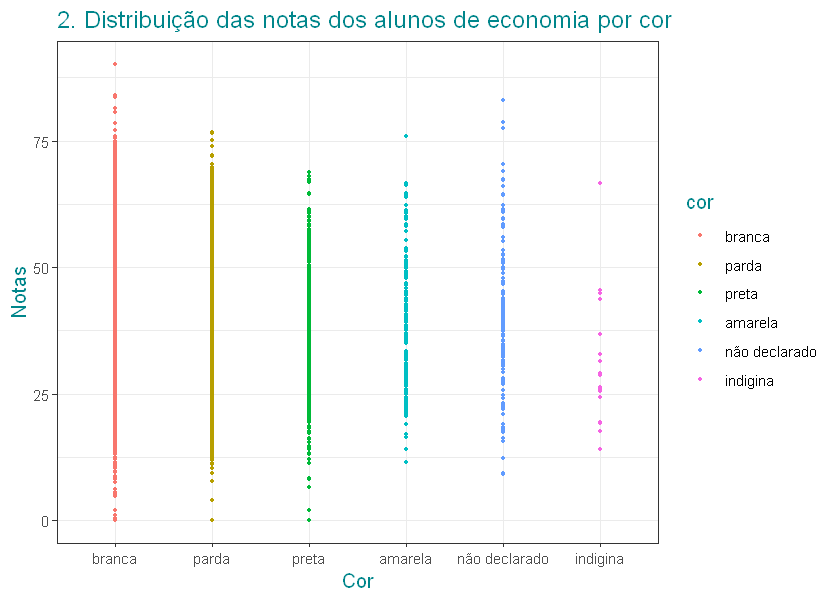

In [32]:
df_1$cor = factor(df_1$cor, levels=names(sort(table(df_1$cor), decreasing=TRUE)))
ggplot(data=df_1, aes(y=nota, x=cor))+
    geom_point(aes(color=cor), size=0.8)+
    ggtitle("2. Distribuição das notas dos alunos de economia por cor")+
    labs(x="Cor", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

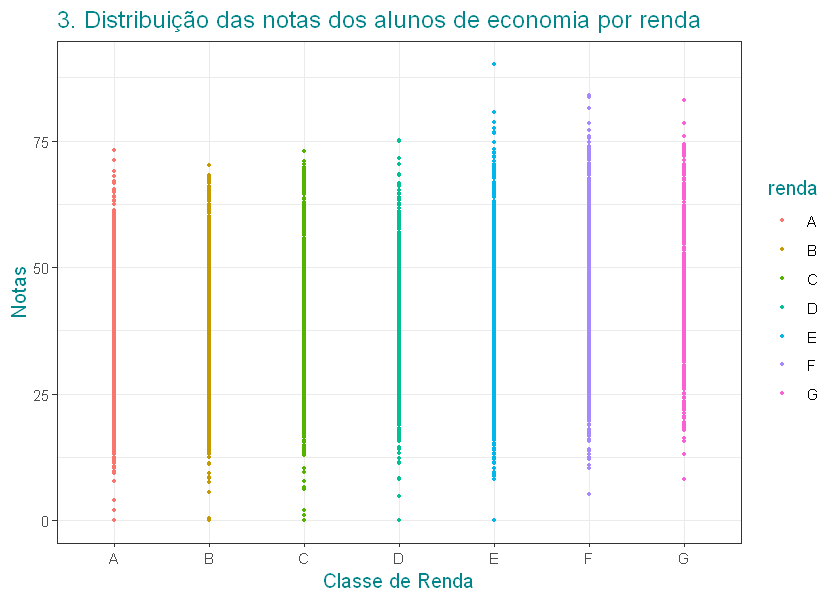

In [113]:
ggplot(data=df_1, aes(y=nota, x=renda))+
    geom_point(aes(color=renda), size=0.8)+
    ggtitle("3. Distribuição das notas dos alunos de economia por renda")+
    labs(x="Classe de Renda", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

In [80]:
df_1$estado_civil = mapvalues(df_1$estado_civil, from=c("A","B","C","D","E"), to=c("solteiro","casado","separado","viuvo","outro"))

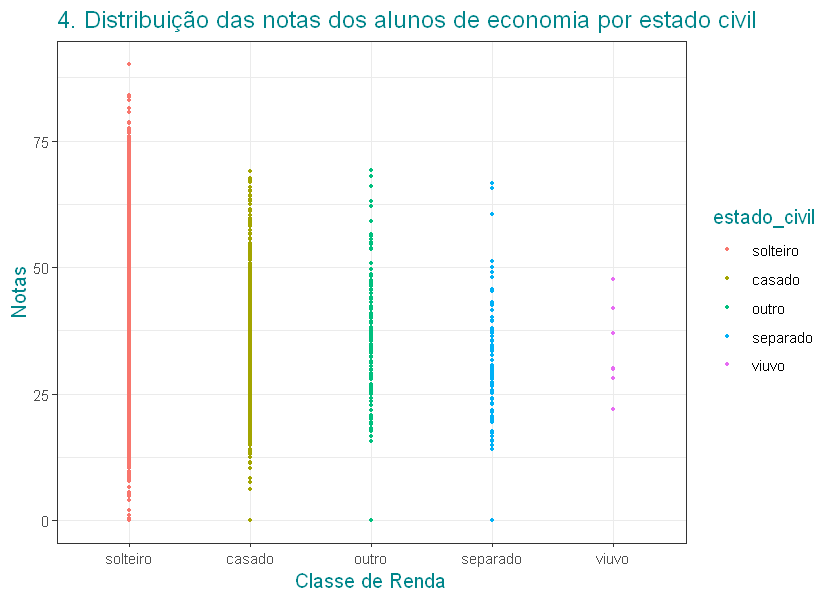

In [114]:
df_1$estado_civil = factor(df_1$estado_civil, levels=names(sort(table(df_1$estado_civil), decreasing=TRUE)))
ggplot(data=df_1, aes(y=nota, x=estado_civil))+
    geom_point(aes(color=estado_civil), size=0.8)+
    ggtitle("4. Distribuição das notas dos alunos de economia por estado civil")+
    labs(x="Classe de Renda", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

In [85]:
table(df_1$situacao_financeira)


          com_renda com_renda_contribui   com_renda_familia          mantenedor 
               1252                1261                2372                 428 
  sem_renda_familia       sem_renda_gov 
               1870                 618 

In [84]:
df_1$situacao_financeira = mapvalues(df_1$situacao_financeira, from=c("A","B","C","D","E", "F"), to=c("sem_renda_gov","sem_renda_familia","com_renda_familia","com_renda","com_renda_contribui","mantenedor"))

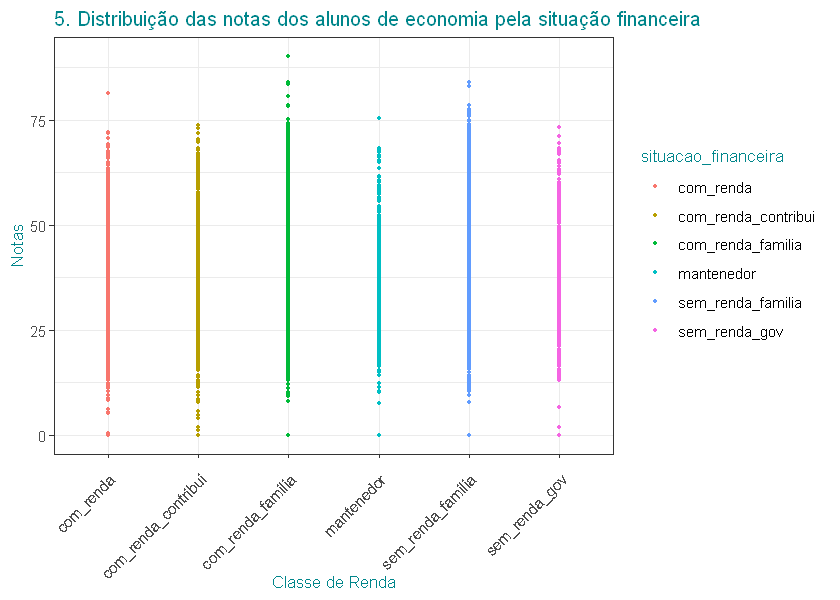

In [116]:
ggplot(data=df_1, aes(y=nota, x=situacao_financeira))+
    geom_point(aes(color=situacao_financeira), size=0.8)+
    ggtitle("5. Distribuição das notas dos alunos de economia pela situação financeira")+
    labs(x="Classe de Renda", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

In [106]:
df_1$trabalho = mapvalues(df_1$trabalho, from=c("A","B","C","D","E"), to=c("nao_trabalha","trabalho_eventual","20h","21h_39h","40h"))

In [109]:
table(df_1$trabalho)


              20h           21h_39h               40h      nao_trabalha 
              336              1151              2866              3120 
trabalho_eventual 
              328 

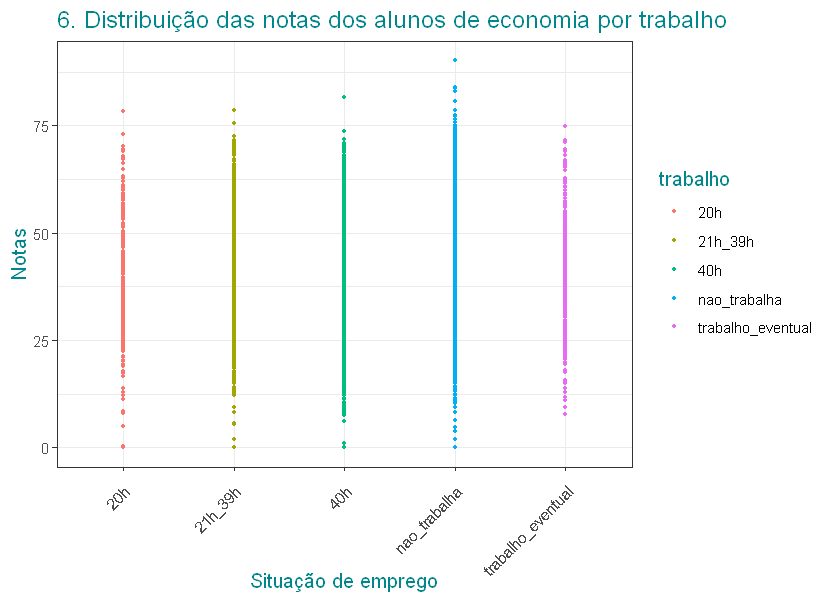

In [117]:
ggplot(data=df_1, aes(y=nota, x=trabalho))+
    geom_point(aes(color=trabalho), size=0.8)+
    ggtitle("6. Distribuição das notas dos alunos de economia por trabalho")+
    labs(x="Situação de emprego", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

In [100]:
df_1$ensino_medio = mapvalues(df_1$ensino_medio, from=c("A","B","C","D","E", "F"), to=c("publica","privada","exterior","mais_publica","mais_privada","brasil_exterior"))

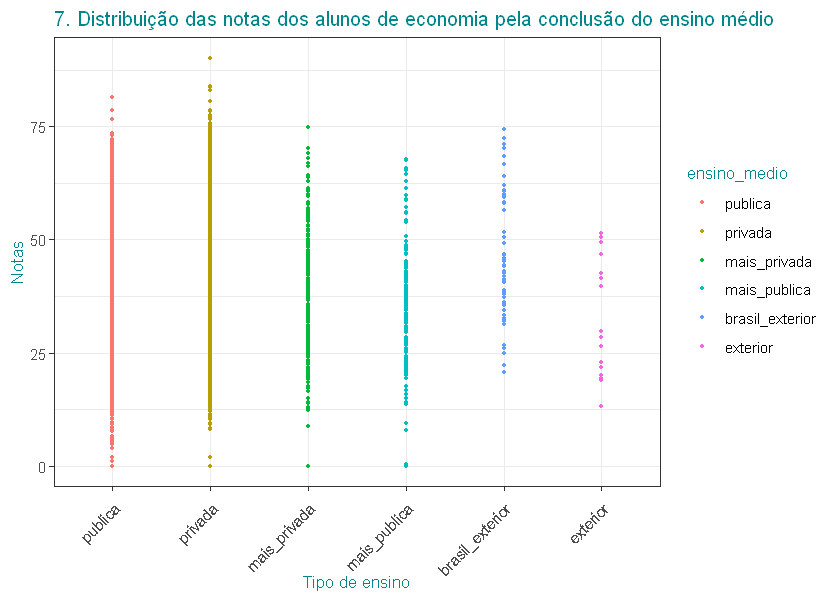

In [119]:
df_1$ensino_medio = factor(df_1$ensino_medio, levels=names(sort(table(df_1$ensino_medio), decreasing=TRUE)))
ggplot(data=df_1, aes(y=nota, x=ensino_medio))+
    geom_point(aes(color=ensino_medio), size=0.8)+
    ggtitle("7. Distribuição das notas dos alunos de economia pela conclusão do ensino médio")+
    labs(x="Tipo de ensino", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

In [122]:
table(df_1$ensino_superior)


   A    B 
5946 1855 

In [126]:
df_1$ensino_superior = mapvalues(df_1$ensino_superior, from=c("A","B"), to=c("sim","não"))

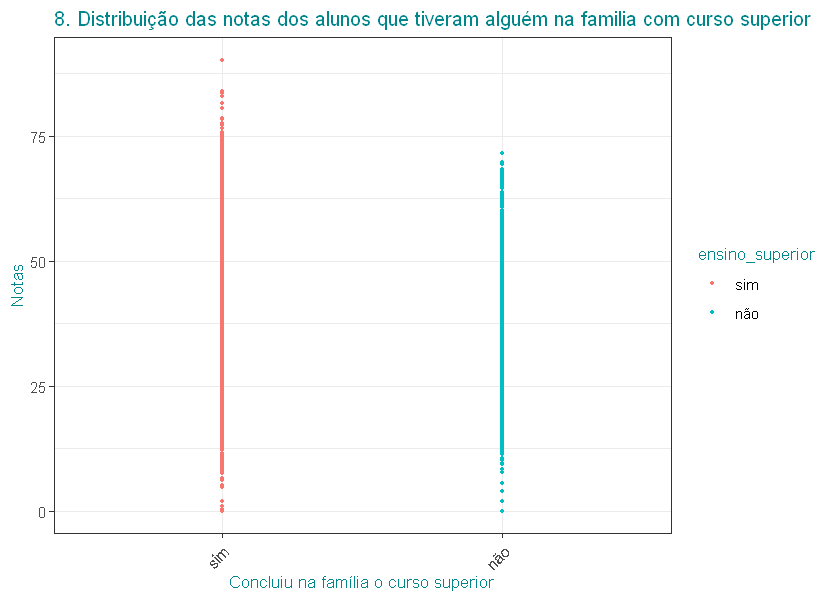

In [130]:
df_1$ensino_superior = factor(df_1$ensino_superior, levels=names(sort(table(df_1$ensino_superior), decreasing=TRUE)))
ggplot(data=df_1, aes(y=nota, x=ensino_superior))+
    geom_point(aes(color=ensino_superior), size=0.8)+
    ggtitle("8. Distribuição das notas dos alunos que tiveram alguém na familia com curso superior")+
    labs(x="Concluiu na família o curso superior", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

In [132]:
table(df_1$horas_estudo)


   A    B    C    D    E 
 672 3026 2423  922  758 

In [134]:
df_1$horas_estudo = mapvalues(df_1$horas_estudo, from=c("A","B","C","D","E"), to=c("nenhuma","1h_3h","4h_7h","8h_12h","12h_"))

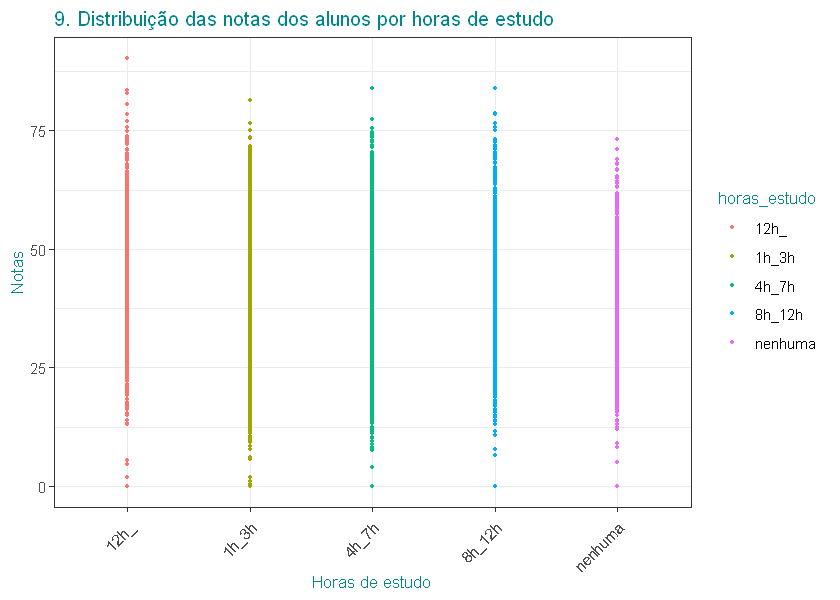

In [135]:
ggplot(data=df_1, aes(y=nota, x=horas_estudo))+
    geom_point(aes(color=horas_estudo), size=0.8)+
    ggtitle("9. Distribuição das notas dos alunos por horas de estudo")+
    labs(x="Horas de estudo", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

In [136]:
table(df_1$infra_salas)


   1    2    3    4    5    6 
 595  423  726 1239 1769 3049 

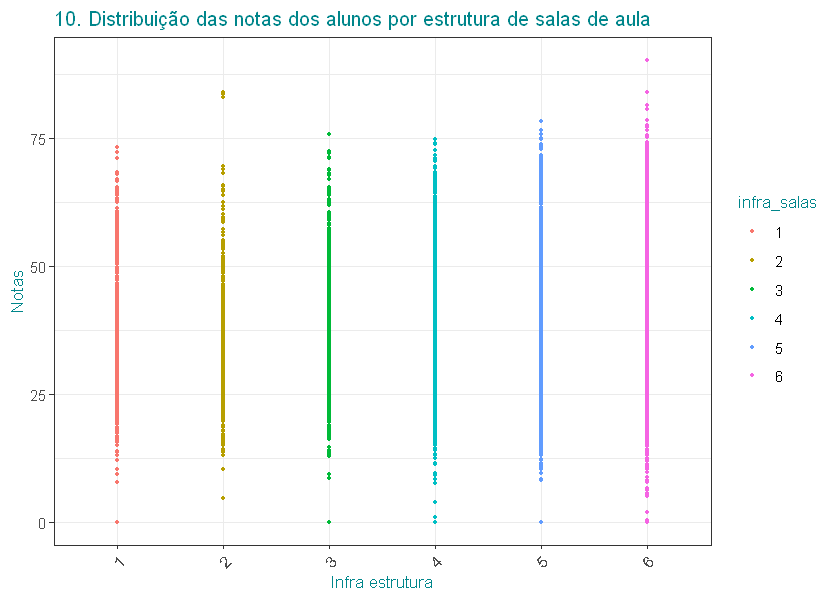

In [138]:
ggplot(data=df_1, aes(y=nota, x=infra_salas))+
    geom_point(aes(color=infra_salas), size=0.8)+
    ggtitle("10. Distribuição das notas dos alunos por estrutura de salas de aula")+
    labs(x="Infra estrutura", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

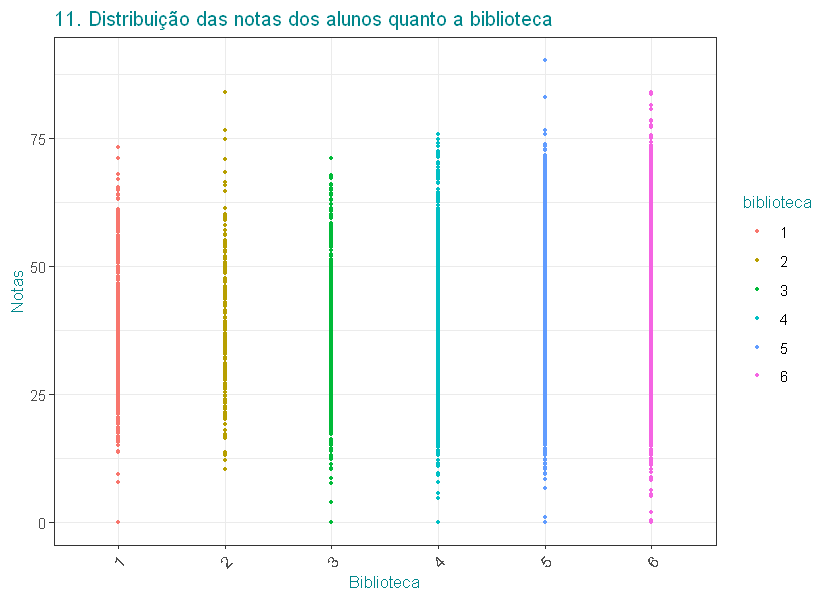

In [139]:
ggplot(data=df_1, aes(y=nota, x=biblioteca))+
    geom_point(aes(color=biblioteca), size=0.8)+
    ggtitle("11. Distribuição das notas dos alunos quanto a biblioteca")+
    labs(x="Biblioteca", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

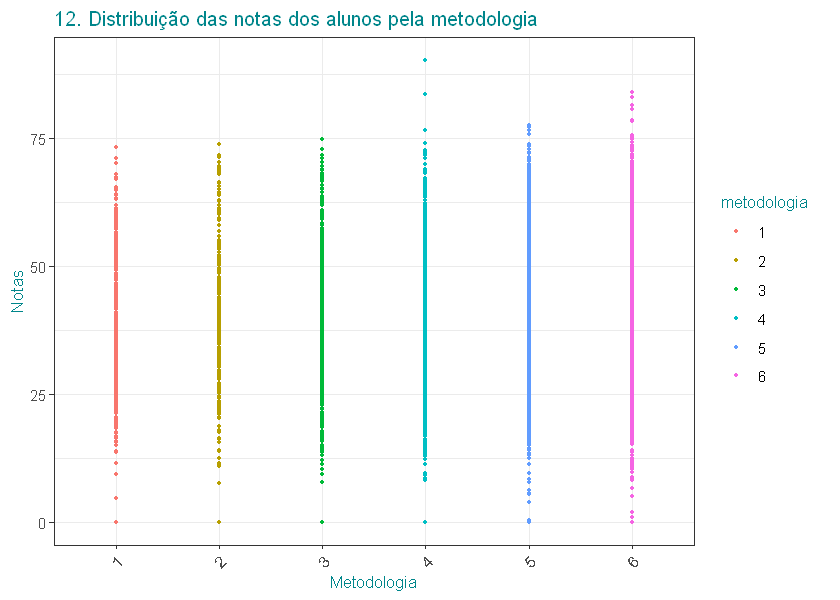

In [140]:
ggplot(data=df_1, aes(y=nota, x=metodologia))+
    geom_point(aes(color=metodologia), size=0.8)+
    ggtitle("12. Distribuição das notas dos alunos pela metodologia")+
    labs(x="Metodologia", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))

In [143]:
# Análise de Variância

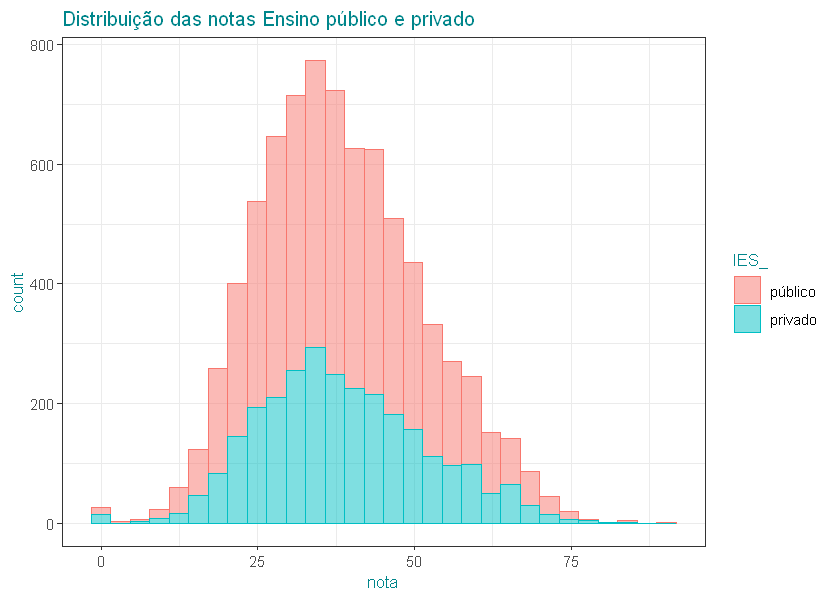

In [70]:
ggplot(df_1, aes(x=nota, color=IES_, fill=IES_)) +
    geom_histogram(alpha=0.5, bins = 30)+
    ggtitle("Distribuição das notas Ensino público e privado")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))


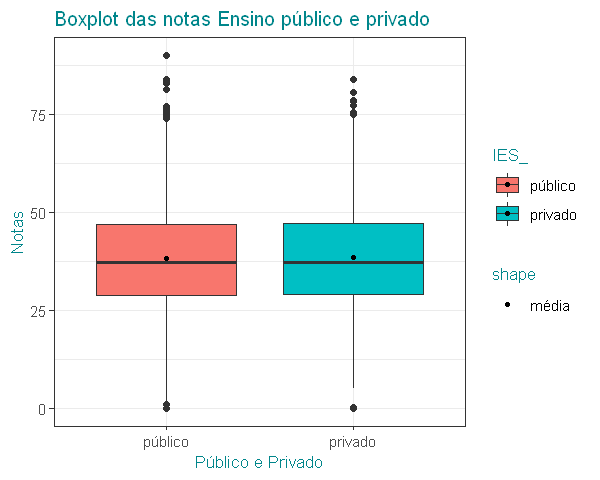

In [71]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_1, aes(x=IES_, y=nota, fill=IES_)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas Ensino público e privado") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))+
    xlab("Público e Privado")+
    ylab("Notas")

In [73]:
str(df_1)

'data.frame':	7801 obs. of  17 variables:
 $ nota               : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ IES                : int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ genero             : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ cor                : Factor w/ 7 levels "","branca","preta",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ renda              : Factor w/ 8 levels "","A","B","C",..: 4 5 4 3 3 4 3 4 5 4 ...
 $ estado_civil       : Factor w/ 6 levels "","A","B","C",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ situacao_financeira: Factor w/ 7 levels "","A","B","C",..: 7 6 4 6 6 6 3 7 4 5 ...
 $ trabalho           : Factor w/ 6 levels "","A","B","C",..: 6 6 6 6 6 6 2 6 4 5 ...
 $ ensino_medio       : Factor w/ 7 levels "","A","B","C",..: 2 5 5 2 3 3 2 3 2 2 ...
 $ ensino_superior    : Factor w/ 3 levels "","A","B": 3 2 3 2 2 3 3 2 2 3 ...
 $ horas_estudo       : Factor w/ 6 levels "","A","B","C",..: 4 3 4 3 4 4 6 4 6 3 ...
 $ infra_salas      

In [75]:
anova = aov(nota ~ IES_,data=df_1)
summary(anova)

              Df  Sum Sq Mean Sq F value Pr(>F)
IES_           1      94   94.39   0.552  0.457
Residuals   7799 1332993  170.92               

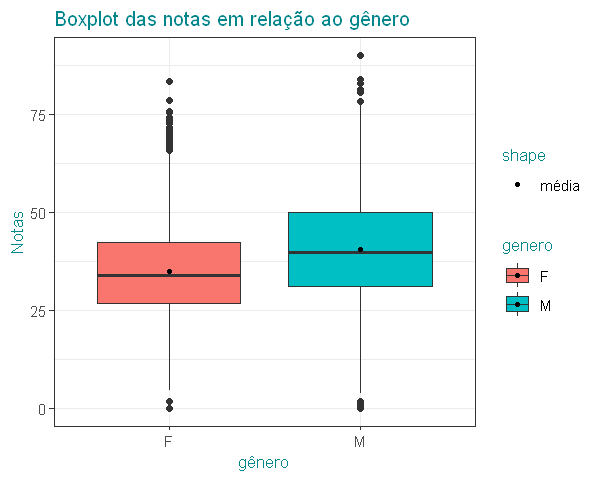

In [166]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_1, aes(x=genero, y=nota, fill=genero)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação ao gênero") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))+
    xlab("gênero")+
    ylab("Notas")

In [188]:
anova_1 = aov(nota ~ as.factor(genero),data=df_1)

In [189]:
summary(anova_1)

                    Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(genero)    1   62333   62333   382.6 <2e-16 ***
Residuals         7799 1270754     163                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Cor

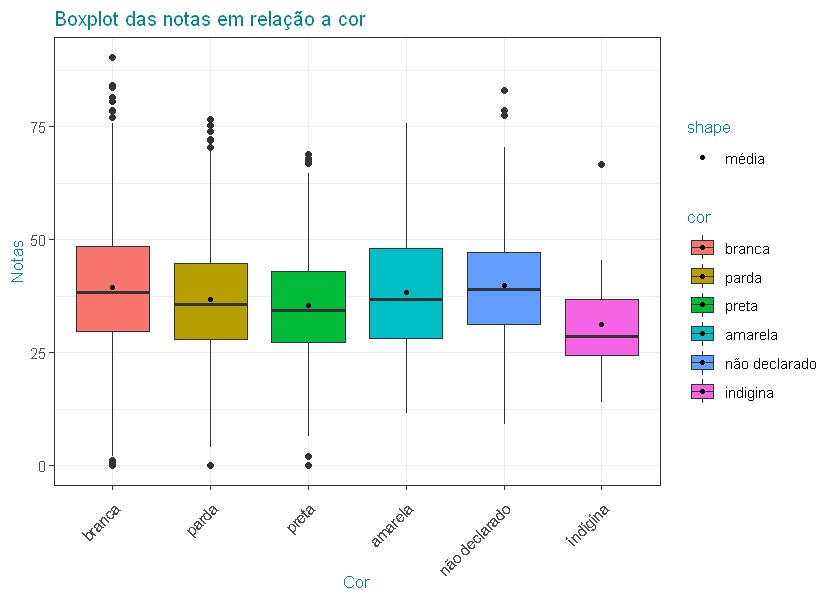

In [50]:
ggplot(df_1, aes(x=cor, y=nota, fill=cor)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação a cor") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"),
         axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Cor")+
    ylab("Notas")

In [48]:
anova_2 = aov(nota ~ as.factor(cor),data=df_1)

In [49]:
summary(anova_2)

                 Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(cor)    5   16736    3347   19.82 <2e-16 ***
Residuals      7795 1316351     169                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Renda

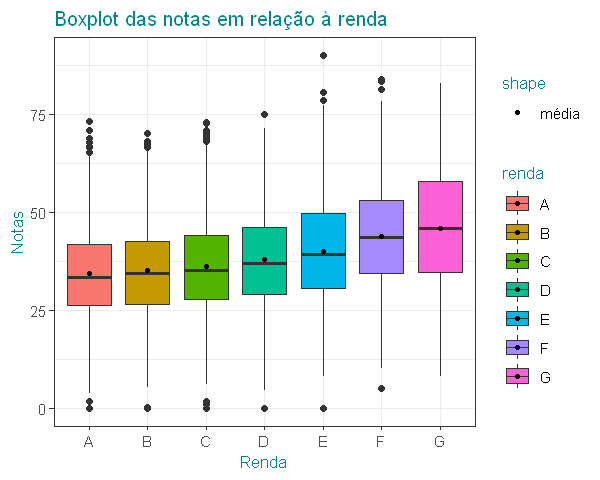

In [163]:
ggplot(df_1, aes(x=renda, y=nota, fill=renda)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação à renda") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))+
    xlab("Renda")+
    ylab("Notas")

In [51]:
anova_3 = aov(nota ~ as.factor(renda),data=df_1)
summary(anova_3)

                   Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(renda)    6  106568   17761   112.9 <2e-16 ***
Residuals        7794 1226519     157                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Estado Civil

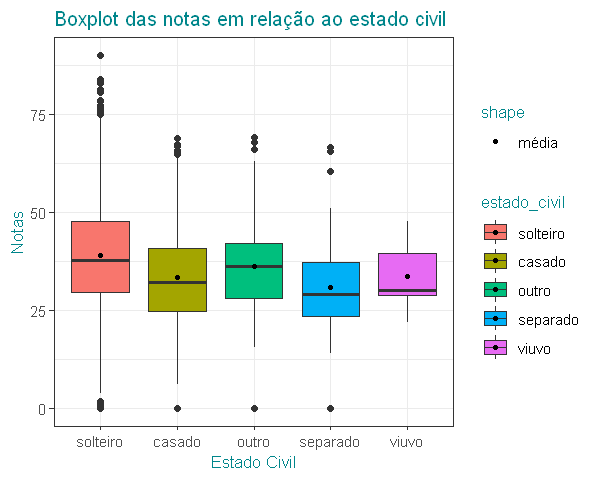

In [170]:
ggplot(df_1, aes(x=estado_civil, y=nota, fill=estado_civil)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação ao estado civil") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))+
    xlab("Estado Civil")+
    ylab("Notas")

In [52]:
anova_4 = aov(nota ~ as.factor(estado_civil),data=df_1)
summary(anova_3)

                   Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(renda)    6  106568   17761   112.9 <2e-16 ***
Residuals        7794 1226519     157                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Situação Financeira

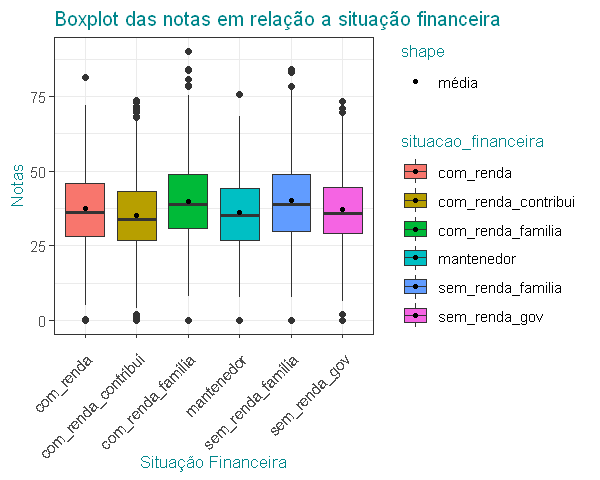

In [172]:
ggplot(df_1, aes(x=situacao_financeira, y=nota, fill=situacao_financeira)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação a situação financeira") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Situação Financeira")+
    ylab("Notas")

In [54]:
anova_5 = aov(nota ~ as.factor(situacao_financeira),data=df_1)
summary(anova_5)

                                 Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(situacao_financeira)    5   26972    5394   32.19 <2e-16 ***
Residuals                      7795 1306116     168                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Trabalho

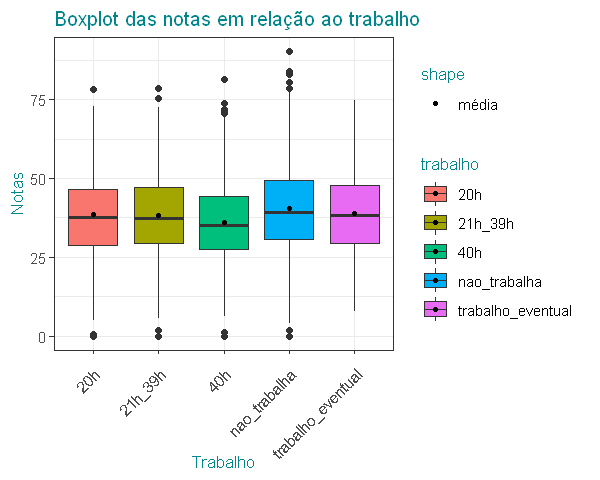

In [174]:
ggplot(df_1, aes(x=trabalho, y=nota, fill=trabalho)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação ao trabalho") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Trabalho")+
    ylab("Notas")

In [55]:
anova_6 = aov(nota ~ as.factor(renda),data=df_1)
summary(anova_6)

                   Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(renda)    6  106568   17761   112.9 <2e-16 ***
Residuals        7794 1226519     157                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Ensino Médio

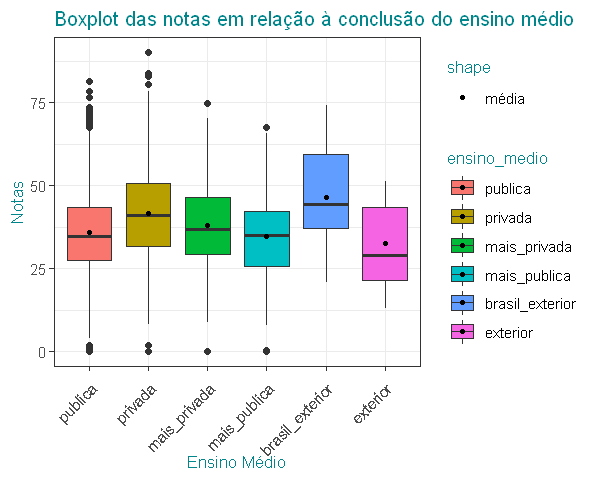

In [175]:
ggplot(df_1, aes(x=ensino_medio, y=nota, fill=ensino_medio)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação à conclusão do ensino médio") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Ensino Médio")+
    ylab("Notas")

In [56]:
anova_7 = aov(nota ~ as.factor(ensino_medio),data=df_1)
summary(anova_7)

                          Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(ensino_medio)    5   65143   13029    80.1 <2e-16 ***
Residuals               7795 1267944     163                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Ensino Superior

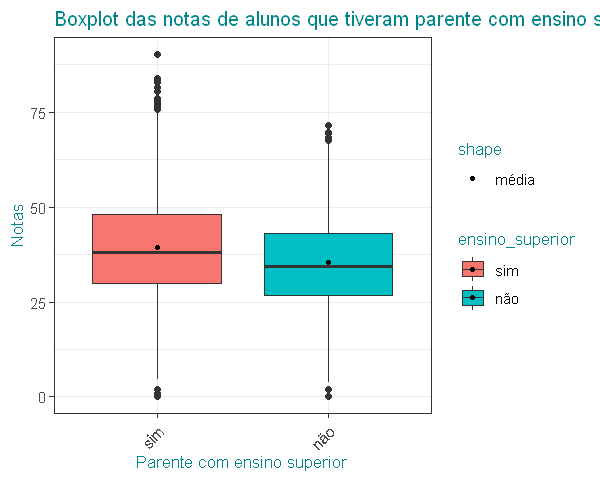

In [176]:
ggplot(df_1, aes(x=ensino_superior, y=nota, fill=ensino_superior)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas de alunos que tiveram parente com ensino superior") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Parente com ensino superior")+
    ylab("Notas")

In [57]:
anova_8 = aov(nota ~ as.factor(ensino_superior),data=df_1)
summary(anova_8)

                             Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(ensino_superior)    1   22649   22649   134.8 <2e-16 ***
Residuals                  7799 1310438     168                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Horas Estudo

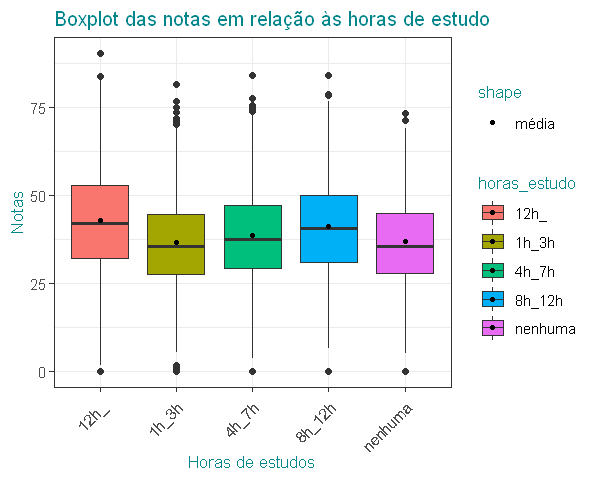

In [177]:
ggplot(df_1, aes(x=horas_estudo, y=nota, fill=horas_estudo)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação às horas de estudo") +
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Horas de estudos")+
    ylab("Notas")

In [58]:
anova_9 = aov(nota ~ as.factor(horas_estudo),data=df_1)
summary(anova_9)

                          Df  Sum Sq Mean Sq F value Pr(>F)    
as.factor(horas_estudo)    4   33691    8423   50.53 <2e-16 ***
Residuals               7796 1299396     167                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Infra Salas

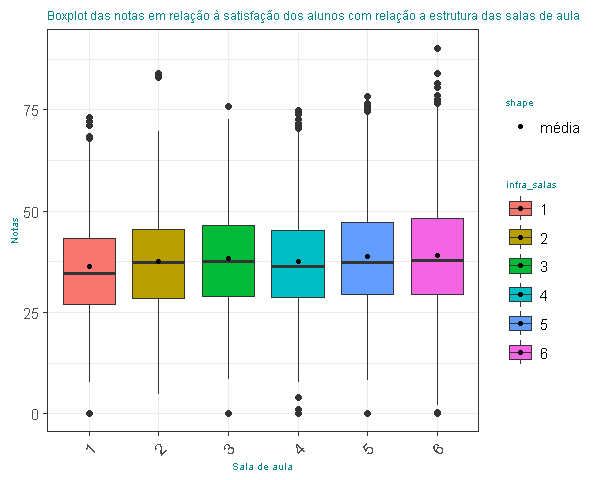

In [183]:
ggplot(df_1, aes(x=infra_salas, y=nota, fill=infra_salas)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação à satisfação dos alunos com relação a estrutura das salas de aula") +
    theme_bw()+
    theme(title=element_text(size=6,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Sala de aula")+
    ylab("Notas")

In [60]:
anova_10 = aov(nota ~ as.factor(infra_salas),data=df_1)
summary(anova_10)

                         Df  Sum Sq Mean Sq F value  Pr(>F)    
as.factor(infra_salas)    5    5926  1185.3   6.962 1.7e-06 ***
Residuals              7795 1327161   170.3                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Biblioteca

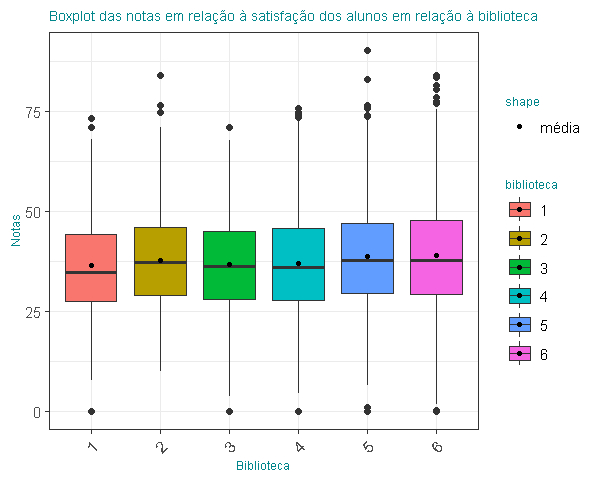

In [185]:
ggplot(df_1, aes(x=biblioteca, y=nota, fill=biblioteca)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação à satisfação dos alunos em relação à biblioteca") +
    theme_bw()+
    theme(title=element_text(size=7,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Biblioteca")+
    ylab("Notas")

In [61]:
anova_11 = aov(nota ~ as.factor(biblioteca),data=df_1)
summary(anova_11)

                        Df  Sum Sq Mean Sq F value   Pr(>F)    
as.factor(biblioteca)    5    7091  1418.2   8.337 7.16e-08 ***
Residuals             7795 1325996   170.1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Metodologia

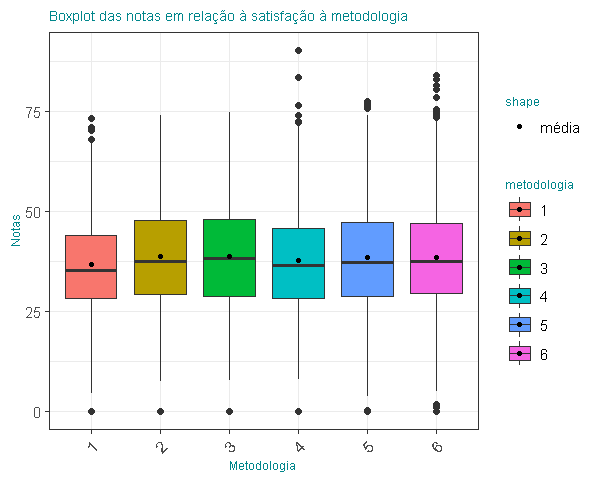

In [186]:
ggplot(df_1, aes(x=metodologia, y=nota, fill=metodologia)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação à satisfação à metodologia") +
    theme_bw()+
    theme(title=element_text(size=7,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Metodologia")+
    ylab("Notas")

In [62]:
anova_12 = aov(nota ~ as.factor(metodologia),data=df_1)
summary(anova_12)

                         Df  Sum Sq Mean Sq F value Pr(>F)  
as.factor(metodologia)    5    2002   400.3   2.344 0.0389 *
Residuals              7795 1331086   170.8                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Moradia

In [83]:
df_1$moradia = mapvalues(df_1$moradia, from=c("A","B","C","D","E","F"), to=c("sozinho","pais","cônjuge"
                                                                             ,"outras_pessoas","universidade",
                                                                            "outros"))

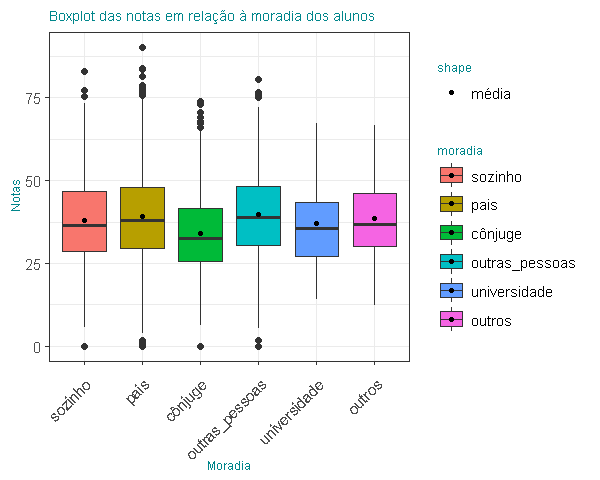

In [84]:
ggplot(df_1, aes(x=moradia, y=nota, fill=moradia)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação à moradia dos alunos") +
    theme_bw()+
    theme(title=element_text(size=7,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Moradia")+
    ylab("Notas")

In [82]:
anova_13 = aov(nota ~ moradia,data=df_1)
summary(anova_13)

              Df  Sum Sq Mean Sq F value Pr(>F)    
moradia        5   25342    5068   30.21 <2e-16 ***
Residuals   7795 1307745     168                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Incentivo

In [86]:
df_1$incentivo = mapvalues(df_1$incentivo, from=c("A","B","C","D","E","F","G"), 
                           to=c("ninguém","pais","outros_familia","professores",
                                "líder_religião", "colegas_amigos","outros"))


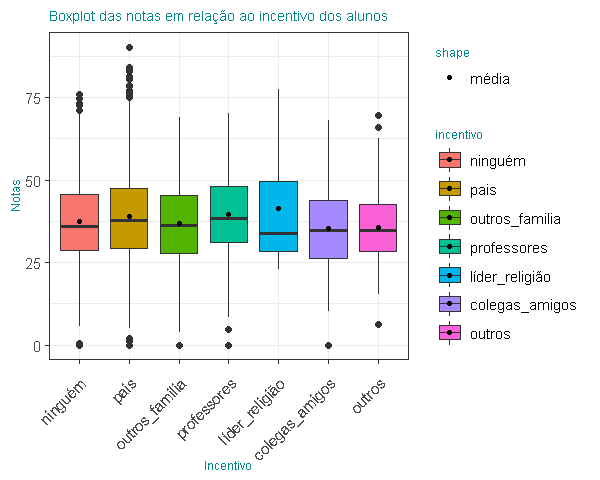

In [87]:
ggplot(df_1, aes(x=incentivo, y=nota, fill=incentivo)) +
    geom_boxplot() +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    ggtitle("Boxplot das notas em relação ao incentivo dos alunos") +
    theme_bw()+
    theme(title=element_text(size=7,color="turquoise4"), 
          axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1))+
    xlab("Incentivo")+
    ylab("Notas")

In [88]:
anova_15 = aov(nota ~ incentivo,data=df_1)
summary(anova_15)

              Df  Sum Sq Mean Sq F value   Pr(>F)    
incentivo      6    6736  1122.6   6.597 5.73e-07 ***
Residuals   7794 1326351   170.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Propostas de modelos:

* Ponderação: esforço, família, história, estrutura da universidade, sexo e raça


In [80]:
str(df_1)

'data.frame':	7801 obs. of  17 variables:
 $ nota               : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ IES                : int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ genero             : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ cor                : Factor w/ 7 levels "","branca","preta",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ renda              : Factor w/ 8 levels "","A","B","C",..: 4 5 4 3 3 4 3 4 5 4 ...
 $ estado_civil       : Factor w/ 6 levels "","A","B","C",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ situacao_financeira: Factor w/ 7 levels "","A","B","C",..: 7 6 4 6 6 6 3 7 4 5 ...
 $ trabalho           : Factor w/ 6 levels "","A","B","C",..: 6 6 6 6 6 6 2 6 4 5 ...
 $ ensino_medio       : Factor w/ 7 levels "","A","B","C",..: 2 5 5 2 3 3 2 3 2 2 ...
 $ ensino_superior    : Factor w/ 3 levels "","A","B": 3 2 3 2 2 3 3 2 2 3 ...
 $ horas_estudo       : Factor w/ 6 levels "","A","B","C",..: 4 3 4 3 4 4 6 4 6 3 ...
 $ infra_salas      

## mod_1 => f(nota) = genero + cor + renda + estado_civil + horas_estudo + infra_salas


In [67]:
mod_anova_1 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + infra_salas, data=df_1)
summary(mod_anova_1)

                          Df  Sum Sq Mean Sq F value Pr(>F)    
genero                     1   62333   62333  425.48 <2e-16 ***
cor                        5   13061    2612   17.83 <2e-16 ***
as.factor(renda)           6   72230   12038   82.17 <2e-16 ***
as.factor(estado_civil)    4   19688    4922   33.60 <2e-16 ***
as.factor(horas_estudo)    4   25605    6401   43.70 <2e-16 ***
infra_salas                5    1135     227    1.55  0.171    
Residuals               7775 1139034     146                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [65]:
mod_anova_2 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + metodologia, data=df_1)
summary(mod_anova_2)

               Df  Sum Sq Mean Sq F value Pr(>F)    
genero          1   62333   62333 425.246 <2e-16 ***
cor             5   13061    2612  17.821 <2e-16 ***
renda           6   72230   12038  82.128 <2e-16 ***
estado_civil    4   19688    4922  33.579 <2e-16 ***
horas_estudo    4   25605    6401  43.670 <2e-16 ***
metodologia     5     501     100   0.684  0.636    
Residuals    7775 1139668     147                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [102]:
mod_anova_3 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + biblioteca, data=df_1)
summary(mod_anova_3)

               Df  Sum Sq Mean Sq F value Pr(>F)    
genero          1   62333   62333 425.280 <2e-16 ***
cor             5   13061    2612  17.822 <2e-16 ***
renda           6   72230   12038  82.134 <2e-16 ***
estado_civil    4   19688    4922  33.582 <2e-16 ***
horas_estudo    4   25605    6401  43.674 <2e-16 ***
biblioteca      1       6       6   0.042  0.837    
Residuals    7779 1140163     147                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## mod_2 => f(nota) = genero + cor + renda + estado_civil + horas_estudo + ensino_medio + moradia + biblioteca

In [89]:
mod_2_anova_1 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + ensino_medio + moradia +
                    biblioteca, data=df_1)
summary(mod_2_anova_1)

               Df  Sum Sq Mean Sq F value   Pr(>F)    
genero          1   62333   62333 428.363  < 2e-16 ***
cor             5   13061    2612  17.951  < 2e-16 ***
renda           6   72230   12038  82.730  < 2e-16 ***
estado_civil    4   19688    4922  33.825  < 2e-16 ***
horas_estudo    4   25605    6401  43.990  < 2e-16 ***
ensino_medio    5    7982    1596  10.970 1.53e-10 ***
moradia         5    1683     337   2.314   0.0413 *  
biblioteca      1       0       0   0.002   0.9633    
Residuals    7769 1130504     146                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [97]:
mod_2_anova_2 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + ensino_medio, data=df_1)
summary(mod_2_anova_2)

               Df  Sum Sq Mean Sq F value   Pr(>F)    
genero          1   62333   62333  428.06  < 2e-16 ***
cor             5   13061    2612   17.94  < 2e-16 ***
renda           6   72230   12038   82.67  < 2e-16 ***
estado_civil    4   19688    4922   33.80  < 2e-16 ***
horas_estudo    4   25605    6401   43.96  < 2e-16 ***
ensino_medio    5    7982    1596   10.96 1.56e-10 ***
Residuals    7775 1132188     146                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [73]:
mod_3_anova_2 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + ensino_medio + biblioteca, data=df_1)
summary(mod_2_anova_2)

               Df  Sum Sq Mean Sq F value   Pr(>F)    
genero          1   62333   62333 428.010  < 2e-16 ***
cor             5   13061    2612  17.937  < 2e-16 ***
renda           6   72230   12038  82.661  < 2e-16 ***
estado_civil    4   19688    4922  33.797  < 2e-16 ***
horas_estudo    4   25605    6401  43.954  < 2e-16 ***
ensino_medio    5    7982    1596  10.961 1.56e-10 ***
metodologia     5     606     121   0.832    0.527    
Residuals    7770 1131582     146                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## mod_3 => f(nota) = genero + cor + renda + estado_civil + horas_estudo + infra_salas
* Inclusão do trabalho no lugar do ensino médio e situação financeira

In [98]:
mod_1_anova_3 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + trabalho + situacao_financeira + infra_salas, data=df_1)
summary(mod_1_anova_3)

                      Df  Sum Sq Mean Sq F value   Pr(>F)    
genero                 1   62333   62333 436.556  < 2e-16 ***
cor                    5   13061    2612  18.295  < 2e-16 ***
renda                  6   72230   12038  84.312  < 2e-16 ***
estado_civil           4   19688    4922  34.472  < 2e-16 ***
horas_estudo           4   25605    6401  44.832  < 2e-16 ***
trabalho               4   25809    6452  45.189  < 2e-16 ***
situacao_financeira    5    4085     817   5.721 2.83e-05 ***
infra_salas            1     846     846   5.927   0.0149 *  
Residuals           7770 1109430     143                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [79]:
mod_2_anova_3 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + trabalho + situacao_financeira + metodologia, data=df_1)
summary(mod_2_anova_3)

                      Df  Sum Sq Mean Sq F value   Pr(>F)    
genero                 1   62333   62333 436.056  < 2e-16 ***
cor                    5   13061    2612  18.274  < 2e-16 ***
renda                  6   72230   12038  84.216  < 2e-16 ***
estado_civil           4   19688    4922  34.433  < 2e-16 ***
horas_estudo           4   25605    6401  44.780  < 2e-16 ***
trabalho               4   25809    6452  45.137  < 2e-16 ***
situacao_financeira    5    4085     817   5.715 2.87e-05 ***
metodologia            5     148      30   0.206     0.96    
Residuals           7766 1110128     143                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [78]:
mod_3_anova_3 = aov(nota~genero + cor + renda + estado_civil + horas_estudo + trabalho + situacao_financeira + biblioteca, data=df_1)
summary(mod_3_anova_3)

                      Df  Sum Sq Mean Sq F value   Pr(>F)    
genero                 1   62333   62333 436.687  < 2e-16 ***
cor                    5   13061    2612  18.300  < 2e-16 ***
renda                  6   72230   12038  84.337  < 2e-16 ***
estado_civil           4   19688    4922  34.483  < 2e-16 ***
horas_estudo           4   25605    6401  44.845  < 2e-16 ***
trabalho               4   25809    6452  45.203  < 2e-16 ***
situacao_financeira    5    4085     817   5.723 2.82e-05 ***
biblioteca             5    1751     350   2.454   0.0314 *  
Residuals           7766 1108525     143                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Construção dos modelos

In [103]:
mod_1 = lm(nota~genero + cor + renda + estado_civil + horas_estudo + biblioteca, data=df_1)
summary(mod_1)


Call:
lm(formula = nota ~ genero + cor + renda + estado_civil + horas_estudo + 
    biblioteca, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.670  -8.397  -0.625   7.975  44.104 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.01257    0.60937  52.534  < 2e-16 ***
generoM           4.67837    0.28428  16.457  < 2e-16 ***
corpreta         -1.55882    0.53570  -2.910 0.003626 ** 
coramarela        0.33629    0.91656   0.367 0.713700    
corparda         -0.57063    0.33096  -1.724 0.084719 .  
corindigina      -6.52805    2.94689  -2.215 0.026773 *  
cornão declarado  0.52173    0.96600   0.540 0.589151    
rendaB            0.97136    0.50008   1.942 0.052123 .  
rendaC            1.90415    0.50600   3.763 0.000169 ***
rendaD            3.16000    0.56002   5.643 1.73e-08 ***
rendaE            4.91219    0.52454   9.365  < 2e-16 ***
rendaF            8.06319    0.53746  15.002  < 2e-16 ***
rendaG            9.07055  

In [105]:
mod_2 = lm(nota~genero + cor + renda + estado_civil + horas_estudo + ensino_medio, data=df_1)
summary(mod_2)


Call:
lm(formula = nota ~ genero + cor + renda + estado_civil + horas_estudo + 
    ensino_medio, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.660  -8.331  -0.633   7.843  43.270 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      31.87178    0.54288  58.709  < 2e-16 ***
generoM           4.72180    0.28387  16.634  < 2e-16 ***
corpreta         -1.36802    0.53497  -2.557 0.010571 *  
coramarela        0.28328    0.91456   0.310 0.756768    
corparda         -0.41726    0.33082  -1.261 0.207244    
corindigina      -6.62045    2.94320  -2.249 0.024515 *  
cornão declarado  0.54883    0.96355   0.570 0.568969    
rendaB            0.86949    0.49348   1.762 0.078115 .  
rendaC            1.60204    0.49989   3.205 0.001357 ** 
rendaD            2.70885    0.55843   4.851 1.25e-06 ***
rendaE            4.21829    0.52984   7.961 1.94e-15 ***
rendaF            6.88464    0.56496  12.186  < 2e-16 ***
rendaG            7.48071

In [190]:
mod_3 = lm(nota~genero + cor + renda + estado_civil + horas_estudo + trabalho + situacao_financeira + infra_salas, data=df_1)
summary(mod_3)


Call:
lm(formula = nota ~ genero + cor + renda + estado_civil + horas_estudo + 
    trabalho + situacao_financeira + infra_salas, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.539  -8.215  -0.545   7.734  40.868 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           32.9115     0.6141  53.591  < 2e-16 ***
generoM                4.7933     0.2826  16.960  < 2e-16 ***
corB                  -1.4987     0.5304  -2.825 0.004733 ** 
corC                   0.2448     0.9063   0.270 0.787106    
corD                  -0.5825     0.3287  -1.772 0.076414 .  
corE                  -7.0437     2.9094  -2.421 0.015499 *  
corF                   0.3336     0.9547   0.349 0.726756    
rendaB                 2.2613     0.5197   4.351 1.37e-05 ***
rendaC                 3.5382     0.5331   6.636 3.43e-11 ***
rendaD                 4.8118     0.5842   8.237  < 2e-16 ***
rendaE                 6.7404     0.5578  12.083  < 2e-16 ***
ren

In [204]:
mod_4 = lm(nota~genero +estado_civil+ renda + trabalho + ensino_medio + ensino_superior + horas_estudo, data=df_1)
summary(mod_4)


Call:
lm(formula = nota ~ genero + estado_civil + renda + trabalho + 
    ensino_medio + ensino_superior + horas_estudo, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.853  -8.230  -0.567   7.767  41.519 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       32.7836     0.5404  60.662  < 2e-16 ***
generoM            4.8281     0.2814  17.159  < 2e-16 ***
estado_civilB     -3.4839     0.4681  -7.442 1.10e-13 ***
estado_civilC     -4.9160     1.2937  -3.800 0.000146 ***
estado_civilD     -2.5411     4.5223  -0.562 0.574194    
estado_civilE     -0.3987     1.0794  -0.369 0.711821    
rendaB             2.0014     0.4968   4.029 5.67e-05 ***
rendaC             3.0619     0.5096   6.009 1.95e-09 ***
rendaD             4.1526     0.5663   7.333 2.47e-13 ***
rendaE             5.8938     0.5430  10.855  < 2e-16 ***
rendaF             8.3746     0.5747  14.572  < 2e-16 ***
rendaG             9.0069     0.7449  12.091  < 2e-16 ***
tr

In [ ]:
# Saber porque as variáveis de estrutura não colaboram para melhoria do modelo